# Predict next-day rain in Australia

In [1106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#pd.set_option('display.max_columns',None)   
#pd.set_option('display.max_rows',None)     

weather = pd.read_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/7 Predict next-day rain in Australia/day08_weatherAUS5000.csv",index_col=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [1107]:
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [1108]:
X.shape        #just get 5000 information from the data

(5000, 21)

In [1109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

In [1110]:
X.isnull().mean()     # Missing value % , isnull().sum(all true)/X.shape[0]

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [1111]:
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [1112]:
print(Y.shape)
Y.isnull().sum()

(5000,)


0

In [1113]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)
# print(Xtrain.head())

for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4


In [1114]:
Ytrain.head()

0     No
1     No
2     No
3    Yes
4     No
Name: RainTomorrow, dtype: object

In [1115]:
Ytrain.value_counts()

No     2704
Yes     796
Name: RainTomorrow, dtype: int64

In [1116]:
Ytest.value_counts()

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

few sample imbalance

In [1117]:
Ytrain.value_counts()[0]/Ytrain.value_counts()[1]

3.3969849246231156

 0:1 = 3:1

In [1118]:
from sklearn.preprocessing import LabelEncoder 

encorder = LabelEncoder().fit(Ytrain) 
Ytrain = pd.DataFrame(encorder.transform(Ytrain))      
Ytest = pd.DataFrame(encorder.transform(Ytest))

In [1119]:
#Ytrain
#Ytest

In [1120]:
Ytrain.to_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/7 Predict next-day rain in Australia/Ytrain.csv")

In [1121]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


In [1122]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


In [1123]:
print(Xtrain.shape)
Xtest.shape

(3500, 21)


(1500, 21)

In [1124]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4


In [1125]:
Xtrain.iloc[0,0]

'2015-08-24'

In [1126]:
type(Xtrain.iloc[0,0])

str

In [1127]:
Xtrain.iloc[:,0].value_counts()

2015-10-12    6
2014-05-16    6
2015-07-03    6
2009-03-30    5
2016-09-07    5
             ..
2010-06-14    1
2013-12-01    1
2009-01-18    1
2014-11-24    1
2014-04-04    1
Name: Date, Length: 2141, dtype: int64

In [1128]:
Xtrainc = Xtrain.copy()
Xtrainc.sort_values(by="Location")

print(Xtrain.iloc[:,0].value_counts())

2015-10-12    6
2014-05-16    6
2015-07-03    6
2009-03-30    5
2016-09-07    5
             ..
2010-06-14    1
2013-12-01    1
2009-01-18    1
2014-11-24    1
2014-04-04    1
Name: Date, Length: 2141, dtype: int64


In [1129]:
Xtrain.iloc[:,0].value_counts().count()        #2141 categroies

2141

In [1130]:
Xtrainc = Xtrain.copy()
Xtrainc.sort_values(by="Location").head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2796,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,13.0,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7
2975,2012-08-17,Adelaide,7.8,13.2,17.6,0.8,NaN,SW,61.0,SW,...,20.0,28.0,76.0,47.0,1012.5,1014.7,NaN,NaN,8.3,12.5
775,2013-03-16,Adelaide,17.4,23.8,NaN,NaN,9.7,SSE,46.0,S,...,9.0,19.0,63.0,57.0,1019.9,1020.5,NaN,NaN,19.1,20.7
861,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4


## Date

In [1131]:
Xtrain.loc[Xtrain.iloc[:,0] == "2015-08-24",:]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4


In [1132]:
Xtrain.iloc[:,0].value_counts()

2015-10-12    6
2014-05-16    6
2015-07-03    6
2009-03-30    5
2016-09-07    5
             ..
2010-06-14    1
2013-12-01    1
2009-01-18    1
2014-11-24    1
2014-04-04    1
Name: Date, Length: 2141, dtype: int64

In [1133]:
Xtrain["Rainfall"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Rainfall, dtype: float64

In [1134]:
Xtrain["Rainfall"].isnull().sum()

33

In [1135]:
Xtrain.loc[Xtrain.loc[:,"Rainfall"] >= 1,"RainToday"] = "Yes"   # >1mm rain
Xtrain.loc[Xtrain.loc[:,"Rainfall"] < 1,"RainToday"] = "No"  # <1mm no rain
Xtrain.loc[Xtrain.loc[:,"Rainfall"] == np.nan,"RainToday"] = np.nan 

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1136]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [1137]:
Xtrain.loc[:,"RainToday"]

0        No
1        No
2        No
3        No
4        No
       ... 
3495     No
3496    Yes
3497     No
3498     No
3499     No
Name: RainToday, Length: 3500, dtype: object

In [1138]:
Xtest.loc[Xtest.loc[:,"Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest.loc[:,"Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest.loc[:,"Rainfall"] == np.nan,"RainToday"] = np.nan

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1139]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [1140]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-01-23,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,2009-03-05,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,2010-03-05,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-26,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,2016-11-28,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [1141]:
Xtrain.loc[0,'Date']

'2015-08-24'

In [1142]:
Xtrain.loc[0,'Date'].split("-")

['2015', '08', '24']

In [1143]:
Xtrain.loc[0,'Date'].split("-")[1]

'08'

In [1144]:
int(Xtrain.loc[0,'Date'].split("-")[1])

8

In [1145]:
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1])) 

/var/folders/n6/p8vzps7n0_9_l77rgyj6_97m0000gn/T/ipykernel_90469/152917531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))


In [1146]:
Xtrain.loc[:,"Date"].value_counts().head()

3    334
5    324
7    316
6    302
9    302
Name: Date, dtype: int64

In [1147]:
Xtrain = Xtrain.rename(columns={"Date":"Month"})       #以前所有名字一起改的

In [1148]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [1149]:
Xtrain.loc[:,"Month"].value_counts()

3     334
5     324
7     316
6     302
9     302
1     300
11    299
10    282
4     265
2     264
12    259
8     253
Name: Month, dtype: int64

In [1150]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

Xtest.head()


/var/folders/n6/p8vzps7n0_9_l77rgyj6_97m0000gn/T/ipykernel_90469/2094540098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))


,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


## Location

In [1151]:
print(Xtrain.loc[:,"Location"])
Xtrain.loc[:,"Location"].value_counts().count()

0         Katherine
1       Tuggeranong
2            Albany
3              Sale
4           Mildura
           ...     
3495      NorahHead
3496     Wollongong
3497    Witchcliffe
3498       Watsonia
3499     PearceRAAF
Name: Location, Length: 3500, dtype: object


49

more than 25 categories will be regonized to continous variable, so we cannot use location as classification

We get difference climates from difference city depended on latitude and longitude

In [1152]:
cityll = pd.read_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/7 Predict next-day rain in Australia/day08_cityll.csv",index_col=0)
city_climate = pd.read_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/7 Predict next-day rain in Australia/day08_Cityclimate.csv")

print(cityll.head())         ## every city latitude and longitude
print(city_climate.head())

           City  Latitude  Longitude Latitudedir Longitudedir
0      Adelaide  34.9285°  138.6007°          S,            E
1        Albany  35.0275°  117.8840°          S,            E
2        Albury  36.0737°  146.9135°          S,            E
3       Wodonga  36.1241°  146.8818°          S,            E
4  AliceSprings  23.6980°  133.8807°          S,            E
           City                      Climate
0      Adelaide            Warm temperate   
1        Albany            Mild temperate   
2        Albury  Hot dry summer, cool winter
3       Wodonga  Hot dry summer, cool winter
4  AliceSprings  Hot dry summer, warm winter


In [1153]:
print(cityll.loc[0,"Latitude"])
print(cityll.loc[0,"Latitude"][:-1])   
print(type((cityll.loc[0,"Latitude"])[:-1]))
print(float((cityll.loc[0,"Latitude"])[:-1]))   #换成浮点数


34.9285°
34.9285
<class 'str'>
34.9285


In [1154]:
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))

cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir,Latitudenum,Longitudenum
0,Adelaide,34.9285°,138.6007°,"S,",E,34.9285,138.6007
1,Albany,35.0275°,117.8840°,"S,",E,35.0275,117.8840
2,Albury,36.0737°,146.9135°,"S,",E,36.0737,146.9135
3,Wodonga,36.1241°,146.8818°,"S,",E,36.1241,146.8818
4,AliceSprings,23.6980°,133.8807°,"S,",E,23.6980,133.8807


In [1155]:
cityll.loc[:,"Latitudedir"].value_counts()

S,    100
Name: Latitudedir, dtype: int64

In [1156]:
citylld=cityll.iloc[:,[0,5,6]]

In [1157]:
citylld

,City,Latitudenum,Longitudenum
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807
...,...,...,...
95,Wollongong,34.4278,150.8931
96,Wyndham,15.4825,128.1228
97,Yalgoo,28.3445,116.6851
98,Yulara,25.2335,130.9849


In [1158]:
citylld["climate"] = city_climate.iloc[:,-1]
citylld.head()

/var/folders/n6/p8vzps7n0_9_l77rgyj6_97m0000gn/T/ipykernel_90469/2349970530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citylld["climate"] = city_climate.iloc[:,-1]


,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [1159]:
citylld.loc[:,"climate"].value_counts()

Hot dry summer, cool winter          24
Warm temperate                       18
Hot dry summer, warm winter          18
High humidity summer, warm winter    17
Mild temperate                        9
Cool temperate                        9
Warm humid summer, mild winter        5
Name: climate, dtype: int64

In [1160]:
#  All the Australia city latitude and longitude
samplecity = pd.read_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/7 Predict next-day rain in Australia/day08_samplecity.csv",index_col=0)
samplecity.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Canberra,35.2809°,149.1300°,"S,",E
1,Sydney,33.8688°,151.2093°,"S,",E
2,Perth,31.9505°,115.8605°,"S,",E
3,Darwin,12.4634°,130.8456°,"S,",E
4,Hobart,42.8821°,147.3272°,"S,",E


distance = R * arccos(sin(slat)*sin(elat)+cos(slat)*cos(elat)*cos(slon-elon))

In [1161]:
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[0,5,6]]

samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


In [1162]:
# use radians to change angles to radian
from math import radians, sin, cos, acos
citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [1163]:
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon
0,Canberra,35.2809,149.1300,0.615768,2.602810
1,Sydney,33.8688,151.2093,0.591122,2.639100
2,Perth,31.9505,115.8605,0.557641,2.022147
3,Darwin,12.4634,130.8456,0.217527,2.283687
4,Hobart,42.8821,147.3272,0.748434,2.571345


In [1164]:
citylld.head()

,City,Latitudenum,Longitudenum,climate,slat,slon
0,Adelaide,34.9285,138.6007,Warm temperate,0.609617,2.419039
1,Albany,35.0275,117.8840,Mild temperate,0.611345,2.057464
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter",0.629605,2.564124
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter",0.630484,2.563571
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter",0.413608,2.336659


In [1165]:
import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) +
                          np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    #After every calculation, we take the shortest distance city climate to match the sample city
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


Add new features: closest city & climate

In [1166]:
#Check the result, Is it match the city
samplecityd.head(5)

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [1167]:
samplecityd["climate"].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [1168]:
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.head()

,City,climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


In [1169]:
locafinal.columns = ["Location","Climate"]  

In [1170]:
locafinal = locafinal.set_index(keys="Location")         # remember to sex an index， if not the csv will have 0123....to be column 1

In [1171]:
locafinal.head()

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate


In [1172]:
locafinal.to_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/7 Predict next-day rain in Australia/locafinal.csv")

In [1173]:
# climate replace Location

import re
# climate replace Location
Xtrain["Location"] = Xtrain["Location"].map(locafinal.iloc[:,0])
Xtrain.head(2)

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,"High humidity summer, warm winter",17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No


In [1174]:
# drop "," and space
Xtrain["Location"] = Xtrain["Location"].apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [1175]:
Xtrain = Xtrain.rename(columns={"Location":"Climate"})
Xtest = Xtest.rename(columns={"Location":"Climate"})

In [1176]:
Xtrain.head(2)

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No


In [1177]:
Xtest.head(2)

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes


# Missing Value

In [1178]:
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.067714
WindGustSpeed    0.067714
WindDir9am       0.067429
WindDir3pm       0.024286
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.379714
Cloud3pm         0.401429
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.009429
dtype: float64

In [1179]:
#Xtrain.dtypes=="objects"
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()
cate

['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [1180]:
cloud = ["Cloud9am","Cloud3pm"]       # from 0-8 represent different cloud level
cate = cate + cloud
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

### Classification features we use mode filling NaN

In [1181]:
from sklearn.impute import SimpleImputer #0.20, conda, pip

si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
# we need to fit in SimpleImputer
si.fit(Xtrain.loc[:,cate])

SimpleImputer(strategy='most_frequent')

In [1182]:
# Use Xtrain mode to fill Xtrain, Xtest NaN 
#becasue if fill, Xtrain Mean, Mode may change as well, prepare for next time fillna, and complete the data
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [1183]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,7.0,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,7.0,7.0,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,W,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [1184]:
Xtrain.loc[:"cate"].isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.000000
WindGustSpeed    0.067714
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.000000
dtype: float64

In [1185]:
Xtrain.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [1186]:
Xtest.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [1187]:
# Use OrdinalEncoder to deal with classification data

In [1188]:
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()

In [1189]:
oe = oe.fit(Xtrain.loc[:,cate])

In [1190]:
# if here has error shows most time becasue test set has category that training set didn't exist
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [1191]:
Xtrain.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,1.0,2.0,6.0,0.0,0.0,0.0,7.0
1,0.0,6.0,4.0,6.0,0.0,7.0,7.0
2,4.0,13.0,4.0,0.0,0.0,1.0,3.0
3,4.0,8.0,3.0,8.0,0.0,6.0,6.0
4,2.0,5.0,0.0,6.0,0.0,2.0,4.0


In [1192]:
Xtest.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,0.0,11.0,8.0,11.0,1.0,7.0,7.0
1,4.0,12.0,12.0,8.0,1.0,8.0,7.0
2,0.0,4.0,3.0,9.0,0.0,7.0,7.0
3,6.0,12.0,13.0,9.0,0.0,7.0,7.0
4,4.0,0.0,12.0,0.0,0.0,8.0,4.0


### Continuous features we use mean filling NaN

In [1193]:
col = Xtrain.columns.tolist()     # all column names
#col     

In [1194]:
# delete categorise column name
for i in cate:
    col.remove(i)      

In [1195]:
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [1196]:
# Use means to fill NaN
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
impmean = impmean.fit(Xtrain.loc[:,col])

# fill to Xtrain, Xtest
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

print(Xtrain.isnull().mean())
print('-'*50)
print(Xtest.isnull().mean())

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64
--------------------------------------------------
Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: flo

In [1197]:
col.remove("Month")

In [1198]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [1199]:
# Normonization   mean = 0, std = 1, not change data distributions

In [1200]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()   
ss = ss.fit(Xtrain.loc[:,col]) 

Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])  
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.826375,1.774044,-0.314379,0.964367,0.000000,2.0,-1.085893e+00,6.0,...,-0.416443,-0.646283,0.000000,-0.122589,-0.453507,0.0,7.0,1.612270,0.000000,0.0
1,12.0,0.0,-0.427048,0.244031,-0.314379,0.000000,0.000000,6.0,-5.373993e-01,4.0,...,-0.182051,-0.539186,-1.011310,0.414254,0.340522,7.0,7.0,-0.366608,0.270238,0.0
2,4.0,4.0,0.121324,-0.089790,-0.314379,-0.551534,1.062619,13.0,-1.113509e-15,4.0,...,1.458692,0.531786,0.800547,0.399342,0.070852,1.0,3.0,0.078256,-0.132031,0.0
3,11.0,4.0,0.262334,0.911673,-0.314379,0.054826,-0.885225,8.0,-2.239744e-01,3.0,...,1.107105,0.692432,-0.374711,-0.763819,-1.397352,6.0,6.0,0.231658,0.830540,0.0
4,4.0,2.0,-0.975421,0.035393,-0.314379,-0.854715,0.401087,5.0,-1.242605e+00,0.0,...,-0.416443,-0.592734,-0.815433,0.324780,-0.168855,2.0,4.0,-0.704091,0.097837,0.0


In [1201]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,1.531425,0.633489,2.871067,0.000000,0.000000,11.0,1.343150,8.0,...,2.161868e+00,1.174369,1.681991,-1.643646,-1.067755,7.0,7.0,1.412848,0.198404,1.0
1,3.0,4.0,-0.035354,-0.646158,-0.036285,-0.794079,0.107073,12.0,0.951369,12.0,...,1.107105e+00,1.013723,0.506733,0.384430,0.700082,8.0,7.0,-0.335927,-0.606132,1.0
2,3.0,0.0,-0.489720,-1.383346,0.000000,0.000000,0.000000,4.0,0.089450,3.0,...,-4.163637e-16,0.000000,0.000000,0.000000,0.000000,7.0,7.0,0.000000,0.000000,0.0
3,10.0,6.0,0.136992,-0.409702,-0.314379,0.000000,0.000000,12.0,-0.537399,13.0,...,6.383207e-01,-1.556609,-0.031928,0.548465,0.640155,7.0,7.0,-0.029125,-0.304431,0.0
4,11.0,4.0,-0.004018,-0.451429,-0.263817,0.000000,0.000000,0.0,-0.537399,12.0,...,5.234093e-02,1.227917,0.849516,-0.301537,-0.303690,8.0,4.0,-0.520009,-0.390632,0.0


In [1202]:
Ytrain.head()

,0
0,0
1,0
2,0
3,1
4,0


# Modeling

In [1203]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [1204]:
Ytrain = Ytrain.iloc[:,0].ravel()       #Ytrain&Ytest are DataFrame，2 dimension，but model is one dimension
                                        # so we have to reduce dimension to one dimension
Ytest = Ytest.iloc[:,0].ravel()         

In [1205]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000        # how many cache to use for calculate
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)         # predict result from the model
    score = clf.score(Xtest,Ytest)      # accuracy
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))   
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.844000, recall is 0.469388', auc is 0.869029
poly 's testing accuracy 0.840667, recall is 0.457726', auc is 0.868157
rbf 's testing accuracy 0.813333, recall is 0.306122', auc is 0.814873
sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437308


In [1206]:
# If want to get best accuracy to know the minority， chose the highest recall
# If want to get best accuracy prediction, all for accuracy, we don't care recall or AUC
# If we want to get a balance in recall, ROC, and accuracy, we shouldn't satisfy any of them

### When we want a high recall score

In [1207]:
# try to get class weight balance   # will increase the recall
# get the best recall
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
              ,class_weight = "balanced"
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.796667, recall is 0.775510', auc is 0.870062
poly 's testing accuracy 0.793333, recall is 0.763848', auc is 0.871448
rbf 's testing accuracy 0.803333, recall is 0.600583', auc is 0.819713
sigmoid 's testing accuracy 0.562000, recall is 0.282799', auc is 0.437119


Class weight increse the recall and did not satisfy many accuracy. It is work here.

In [1208]:
# try to increse recall more , set class weight for minority heavier
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
          ,class_weight = {1:15} #class 1，weight 10，class 0，weight 1
                                # class_weight = {class：weight}
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))

testing accuracy 0.548000, recall is 0.970845', auc is 0.867172


Recall increase, accuracy will decrease, but auc is ok, still keep in 80%ish
```
Recall high score that can predict more accuracy weather the day rain or not. Even many not rainy day it will show rain,but if it indeed a rain day it won't miss.
```

### When we want a high accuracy score

In [1211]:
valuec = pd.Series(Ytest).value_counts()      # how is the balance situation in the data
valuec

0    1157
1     343
dtype: int64

In [1213]:
valuec[0]/valuec.sum()     # the model all predict as not rain is 77% less than the accurcy taht we do nothing for the model

0.7713333333333333

In [1215]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM

clf = SVC(kernel = "linear"         #no class weight accuracy better
          ,gamma="auto"
          ,cache_size = 5000
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)

In [1216]:
cm = CM(Ytest,result,labels=(1,0))
cm            #161 as 1 predict correct， 182  1 predict wrong， almost half correct
              # just 52 0 wront， 1105 0 correct

array([[ 161,  182],
       [  52, 1105]])

In [1218]:
specificity = cm[1,1]/cm[1,:].sum()
specificity            #almost 0 is correct，and many 1 correct too

0.9550561797752809

#### Try to make 1 prediction more accuracy but not satisfy many 0 prediction
```
    add class weight very small everytime
```

In [1221]:
irange = np.linspace(0.01,0.05,10)      # get 10 numbers between 0.01 to 0.05
irange

array([0.01      , 0.01444444, 0.01888889, 0.02333333, 0.02777778,
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ])

In [1222]:
for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}       #少少的给1这个小数类一点点增加权重
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))

under ratio 1:1.010000 testing accuracy 0.844667, recall is 0.475219', auc is 0.869157
under ratio 1:1.014444 testing accuracy 0.844667, recall is 0.478134', auc is 0.869185
under ratio 1:1.018889 testing accuracy 0.844667, recall is 0.478134', auc is 0.869198
under ratio 1:1.023333 testing accuracy 0.845333, recall is 0.481050', auc is 0.869175
under ratio 1:1.027778 testing accuracy 0.844000, recall is 0.481050', auc is 0.869394
under ratio 1:1.032222 testing accuracy 0.844000, recall is 0.481050', auc is 0.869528
under ratio 1:1.036667 testing accuracy 0.844000, recall is 0.481050', auc is 0.869659
under ratio 1:1.041111 testing accuracy 0.844667, recall is 0.483965', auc is 0.869629
under ratio 1:1.045556 testing accuracy 0.844667, recall is 0.483965', auc is 0.869712
under ratio 1:1.050000 testing accuracy 0.845333, recall is 0.486880', auc is 0.869863


accuracy = 0.845333 is better than0.84

In [1223]:
# get a small range and try to get better result

In [1225]:
irange_1 = np.linspace(0.018889,0.027778,10)

for i in irange_:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))

under ratio 1:1.041111 testing accuracy 0.844667, recall is 0.483965', auc is 0.869641
under ratio 1:1.042099 testing accuracy 0.844667, recall is 0.483965', auc is 0.869533
under ratio 1:1.043086 testing accuracy 0.844667, recall is 0.483965', auc is 0.869664
under ratio 1:1.044074 testing accuracy 0.844667, recall is 0.483965', auc is 0.869661
under ratio 1:1.045062 testing accuracy 0.844667, recall is 0.483965', auc is 0.869790
under ratio 1:1.046049 testing accuracy 0.844667, recall is 0.483965', auc is 0.869785
under ratio 1:1.047037 testing accuracy 0.844667, recall is 0.483965', auc is 0.869593
under ratio 1:1.048025 testing accuracy 0.844667, recall is 0.483965', auc is 0.869636
under ratio 1:1.049012 testing accuracy 0.845333, recall is 0.486880', auc is 0.869823
under ratio 1:1.050000 testing accuracy 0.845333, recall is 0.486880', auc is 0.869863


In [1224]:
irange_2 = np.linspace(0.041111,0.050000,10)

for i in irange_2:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))

under ratio 1:1.041111 testing accuracy 0.844667, recall is 0.483965', auc is 0.869641
under ratio 1:1.042099 testing accuracy 0.844667, recall is 0.483965', auc is 0.869533
under ratio 1:1.043086 testing accuracy 0.844667, recall is 0.483965', auc is 0.869664
under ratio 1:1.044074 testing accuracy 0.844667, recall is 0.483965', auc is 0.869661
under ratio 1:1.045062 testing accuracy 0.844667, recall is 0.483965', auc is 0.869790
under ratio 1:1.046049 testing accuracy 0.844667, recall is 0.483965', auc is 0.869785
under ratio 1:1.047037 testing accuracy 0.844667, recall is 0.483965', auc is 0.869593
under ratio 1:1.048025 testing accuracy 0.844667, recall is 0.483965', auc is 0.869636
under ratio 1:1.049012 testing accuracy 0.845333, recall is 0.486880', auc is 0.869823
under ratio 1:1.050000 testing accuracy 0.845333, recall is 0.486880', auc is 0.869863


```
As we can see, 0.84453 is the best in [0.018889,0.027778] and [0.041111,0.050000]
If we still want to get better result, we should try other methods.

And becasue the data is good at linear kernel，whcih means it should good at logistic regression.

Let's try it
```

In [1226]:
from sklearn.linear_model import LogisticRegression as LR

logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8486666666666667

It did get better result

In [1227]:
# try to optimize it
C_range = np.linspace(3,5,10)

for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8493333333333334
3.2222222222222223 0.8493333333333334
3.4444444444444446 0.8493333333333334
3.6666666666666665 0.8493333333333334
3.888888888888889 0.8493333333333334
4.111111111111111 0.8493333333333334
4.333333333333333 0.8493333333333334
4.555555555555555 0.8493333333333334
4.777777777777778 0.8493333333333334
5.0 0.8493333333333334


In [1228]:
C_range = np.linspace(5,10,10)      

for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

5.0 0.8493333333333334
5.555555555555555 0.8493333333333334
6.111111111111111 0.8486666666666667
6.666666666666667 0.8493333333333334
7.222222222222222 0.8493333333333334
7.777777777777778 0.8493333333333334
8.333333333333334 0.8493333333333334
8.88888888888889 0.8493333333333334
9.444444444444445 0.8493333333333334
10.0 0.8493333333333334


84.9% is the best result so far

### When we want balance 

We want good accuracy and good recall

under C 0.010000, testing accuracy is 0.800000,recall is 0.752187', auc is 0.870634
00:00:934290
under C 1.062105, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870009
00:02:299608
under C 2.114211, testing accuracy is 0.794000,recall is 0.772595', auc is 0.870178
00:03:116702
under C 3.166316, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870158
00:03:745533
under C 4.218421, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870153
00:04:648381
under C 5.270526, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870128
00:05:876130
under C 6.322632, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870060
00:07:101652
under C 7.374737, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870029
00:07:473158
under C 8.426842, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870130
00:08:637129
under C 9.478947, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870092
00:11:759037
under C 10.531053, testing acc

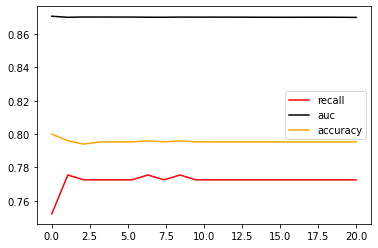

In [1237]:
# C optimize
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)     #C值从0.01到20抽了20个数来循环

recallall = []
aucall = []
scoreall = []

for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
    ,class_weight = "balanced"
    ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %
    (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

It takes time when C bigger. Time consuming

And we can see, best C is 0.01 to get AUC = 0.87

In [1230]:
times = time()
clf = SVC(kernel = "linear",C=0.01, cache_size = 5000
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.800000,recall is 0.752187', auc is 0.870634
00:01:212147


In [1231]:
# ROC optimize

In [1236]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))
area

0.8701578174176202

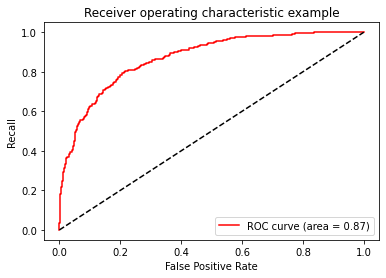

In [1234]:
plt.figure()
plt.plot(FPR, Recall, color='red',      #横坐标，假正率，纵坐标recall
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')     #画一条中间的先，X=Y的线，起始地那就是00，终止点就是11
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Look for the best threshold

In [1239]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))

In [1240]:
thresholds[maxindex]

-0.08963821838192287

In [1241]:
# Based on the best threshold, we need to get y_predict, recall, accuracy
from sklearn.metrics import accuracy_score as AC

clf = SVC(kernel = "linear",C=0.01,cache_size = 5000
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)             

prob = pd.DataFrame(clf.decision_function(Xtest))
prob.head()

,0
0,2.440841
1,0.366799
2,-0.380804
3,-1.064691
4,-0.088258


In [1242]:
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
print(prob.head())

          0  y_pred
0  2.440841     1.0
1  0.366799     1.0
2 -0.380804     0.0
3 -1.064691     0.0
4 -0.088258     1.0


In [1243]:
print(prob.loc[:,"y_pred"].isnull().sum())

0


In [1244]:
times = time()
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.783333,recall is 0.778426
00:00:012561


```
under C 0.010000, testing accuracy is 0.800000,recall is 0.752187', auc is 0.870634
under C 3.166316, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870158

Maybe C=3.166316 will be better because it is more balance 
```